In [80]:
import requests
import pandas as pd
import numpy as np

In [82]:
url = "https://back-end-enfermera.vercel.app/api/productos/dataset"  # O la URL pública si estás usando un servidor remoto
urlcsv = "https://raw.githubusercontent.com/JamesB15Code/datos_productos_enfermeria/main/mi_uniformes_dataset.csv"

# Realizar la solicitud GET
# response = requests.get(url)
# df = ''

# # Verificar que la solicitud fue exitosa
# if response.status_code == 200:
#     productos = response.json()
#     df = pd.DataFrame(productos)
#     df
# else:
#     print(f"Error en la solicitud: {response.status_code}")
df = pd.read_csv(urlcsv)


df.head(5)

,nombre,categoria,precio,descuento,sexo,stock,estado
0,Chaleco,Chalecos,420,NaN,Mujer,30,Activo
1,Filipina Cindy,Filipinas,420,4.0,Mujer,30,Activo
2,Filipina Susana,Filipinas,270,0.0,Mujer,20,Activo
3,Pantalon,Pantalones,500,2.0,Mujer,3,Activo
4,Filipina Luisa,Filipinas,475,NaN,Mujer,15,Activo


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nombre     261 non-null    object 
 1   categoria  261 non-null    object 
 2   precio     261 non-null    int64  
 3   descuento  159 non-null    float64
 4   sexo       261 non-null    object 
 5   stock      261 non-null    int64  
 6   estado     261 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 14.4+ KB


In [84]:
# df = df.drop(['id'], axis=1)
# df.head()

In [85]:
df.isnull().sum()

nombre         0
categoria      0
precio         0
descuento    102
sexo           0
stock          0
estado         0
dtype: int64

In [86]:
df['descuento'].fillna(0, inplace=True)
df.isnull().sum()

C:\Users\isaia\AppData\Local\Temp\ipykernel_12292\415611578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['descuento'].fillna(0, inplace=True)


nombre       0
categoria    0
precio       0
descuento    0
sexo         0
stock        0
estado       0
dtype: int64

In [87]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
columnas = ['sexo', 'estado', 'nombre', 'categoria']
df[columnas] = encoder.fit_transform(df[columnas])
df.head()

,nombre,categoria,precio,descuento,sexo,stock,estado
0,0.0,0.0,420,0.0,1.0,30,0.0
1,1.0,1.0,420,4.0,1.0,30,0.0
2,3.0,1.0,270,0.0,1.0,20,0.0
3,4.0,2.0,500,2.0,1.0,3,0.0
4,2.0,1.0,475,0.0,1.0,15,0.0


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.columns
X = scaler.fit_transform(df)
X = pd.DataFrame(X,columns=columns)
X.head(5)

,nombre,categoria,precio,descuento,sexo,stock,estado
0,-1.470720,-1.336014,-0.114708,-0.847343,1.027189,0.194983,-1.003839
1,-0.774063,-0.081699,-0.114708,1.127269,1.027189,0.194983,-1.003839
2,0.619250,-0.081699,-2.198613,-0.847343,1.027189,-0.340707,-1.003839
3,1.315907,1.172616,0.996708,0.139963,1.027189,-1.251381,-1.003839
4,-0.077406,-0.081699,0.649391,-0.847343,1.027189,-0.608552,-1.003839


In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

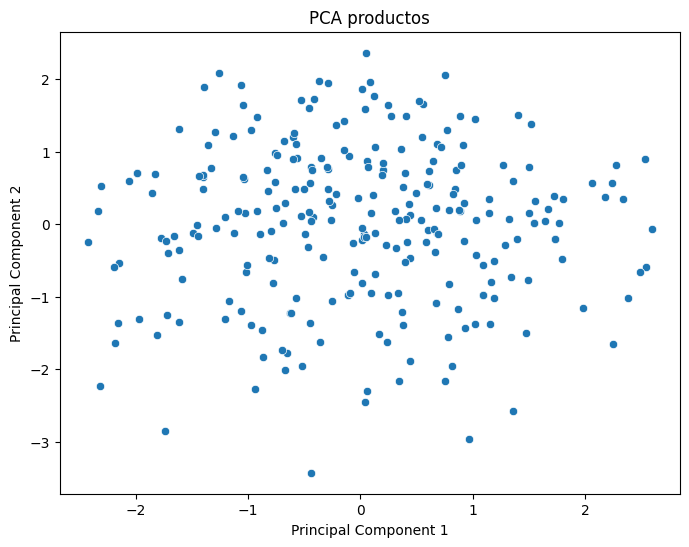

In [90]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA productos')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [91]:
X = df_pca.values
X[0:5,:]

array([[ 0.9267619 , -1.4337264 ],
       [ 1.33604099, -0.72494074],
       [-0.65523494, -1.77842535],
       [ 0.36149525,  1.03580548],
       [ 0.60056926, -0.075457  ]])

In [92]:
from sklearn.cluster import KMeans
inercia =[]
for i in range(2,20):
  km = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, tol=1e-04, random_state=0)
  km.fit(X)
  inercia.append(km.inertia_)

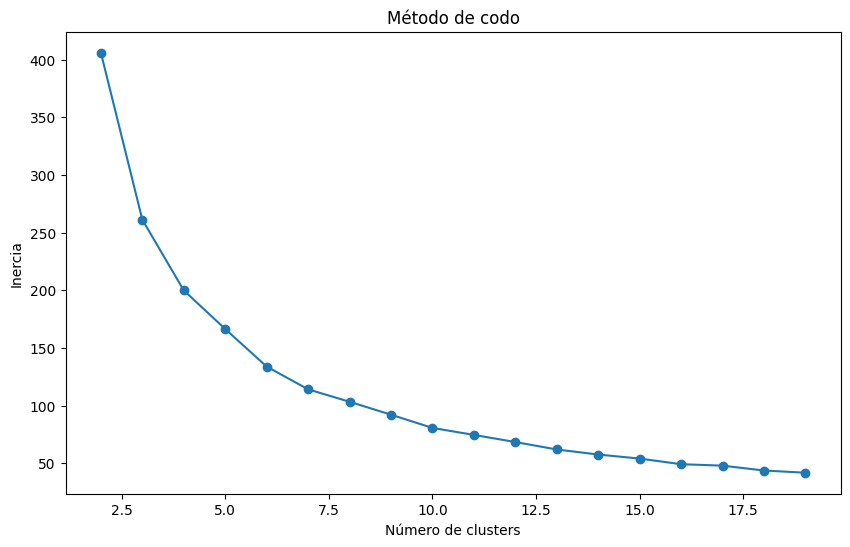

In [93]:
plt.figure(figsize=[10,6])
plt.title('Método de codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(2,20)), inercia, marker='o')

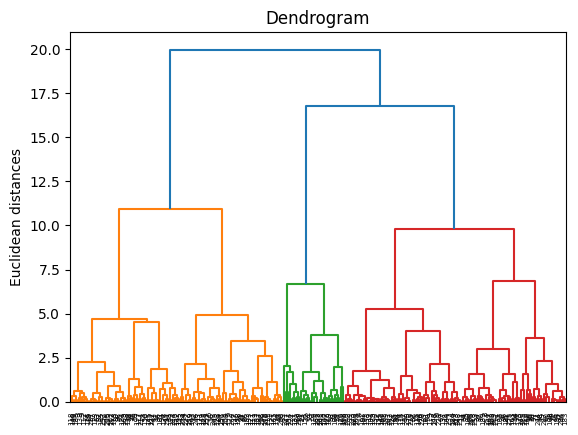

In [94]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('Euclidean distances')
plt.show()

In [95]:
km = KMeans(n_clusters=3, init='random',max_iter=300, n_init=10,tol=1e-04, random_state=0)
y_hc= km.fit_predict(X)

In [96]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)

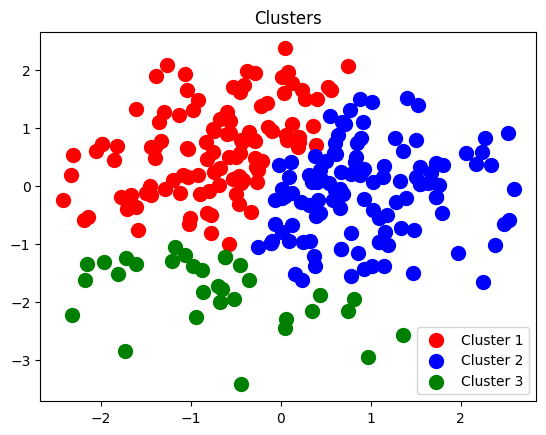

In [97]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [98]:
from sklearn import metrics
acc= metrics.adjusted_rand_score(['a','a','b','c','b'],[2,2,1,0,1])
acc

1.0

In [99]:
clusters_df = pd.DataFrame({'tipo_productos': y_hc})
df_with_clusters = pd.concat([df, clusters_df], axis=1)
df_with_clusters

,nombre,categoria,precio,descuento,sexo,stock,estado,tipo_productos
0,0.0,0.0,420,0.0,1.0,30,0.0,1
1,1.0,1.0,420,4.0,1.0,30,0.0,1
2,3.0,1.0,270,0.0,1.0,20,0.0,2
3,4.0,2.0,500,2.0,1.0,3,0.0,0
4,2.0,1.0,475,0.0,1.0,15,0.0,1
...,...,...,...,...,...,...,...,...
256,4.0,0.0,380,0.0,0.0,15,1.0,0
257,4.0,1.0,475,0.0,1.0,10,1.0,0
258,0.0,1.0,420,0.0,1.0,3,0.0,1
259,3.0,2.0,270,5.0,0.0,15,0.0,0


In [100]:
scalerR = StandardScaler()
encoder_tipo = OrdinalEncoder()
encoder_categoria = OrdinalEncoder()
encoder_genero = OrdinalEncoder()

In [101]:
X = df_with_clusters.drop(['tipo_productos'], axis=1)
y = df_with_clusters['tipo_productos']

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [103]:
X = df_with_clusters.drop('tipo_productos', axis=1)
y = df_with_clusters['tipo_productos']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [105]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8301886792452831
